# **BASIC EXPLORATION**

In [28]:
# importing neccessary libararies
import numpy as np
import pandas as pd
import sklearn as sln
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# reading the project file
H_I= pd.read_excel('Health_insurance_cost.xlsx')
H_I

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


Here target variable(y) is 'health_insurance_price'


In [30]:
H_I.info() # info() function to get details of all the columns like non-null values, no. of rows and columns, data types of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


# Observation

Columns 'age', 'BMI' and 'health_insurance_price' have some null values.

Data type of all the columns are correctely described.

In [31]:
H_I.nunique() # nunique function is used to check the unique value in each columns

age                         47
gender                       2
BMI                        545
Children                     6
smoking_status               2
location                     4
health_insurance_price    1335
dtype: int64

In [32]:
H_I.drop_duplicates() # drop_duplicate function to delete the duplicate rows

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


In [33]:
H_I.describe(include = 'all')

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
count,1310.000000,1338,1315.000000,1338.000000,1338,1338,1336.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.166412,NaN,30.638217,1.094918,NaN,NaN,13268.527719
std,14.055378,NaN,6.110302,1.205493,NaN,NaN,12112.797724
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.210000,0.000000,NaN,NaN,4744.325050
50%,39.000000,NaN,30.305000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.580000,2.000000,NaN,NaN,16604.302645


In [34]:
H_I.isnull().sum() # isnull_sum() function is used to count the number of null values in each columns

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

# DEALING WITH MISSING VALUES

Replacing missing values with median

In [35]:
from sklearn.impute import SimpleImputer  # importing simple imputer function
H_I_median = H_I.copy(deep= True) # creating copy of original data
median_Imputer= SimpleImputer(strategy= 'median') # assigning median imputer
H_I_median['age']= median_Imputer.fit_transform(H_I_median[['age']]) # applying the median imputer for missing values
H_I_median['BMI']= median_Imputer.fit_transform(H_I_median[['BMI']])
H_I_median['health_insurance_price']= median_Imputer.fit_transform(H_I_median[['health_insurance_price']])

In [36]:
H_I_median.isnull().sum() # checking null value after imputation

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

# OUTLIERS

In [37]:
# checking the outliers in different features

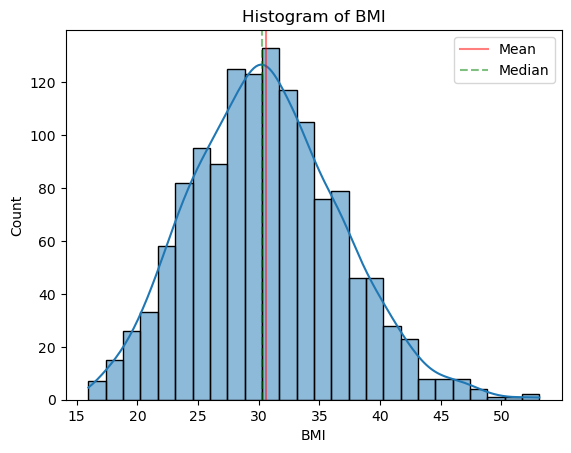

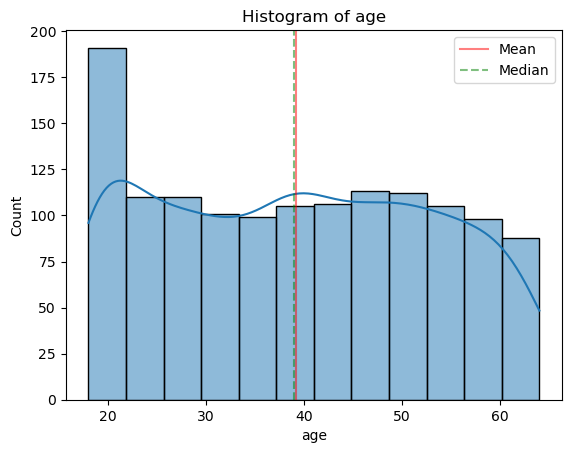

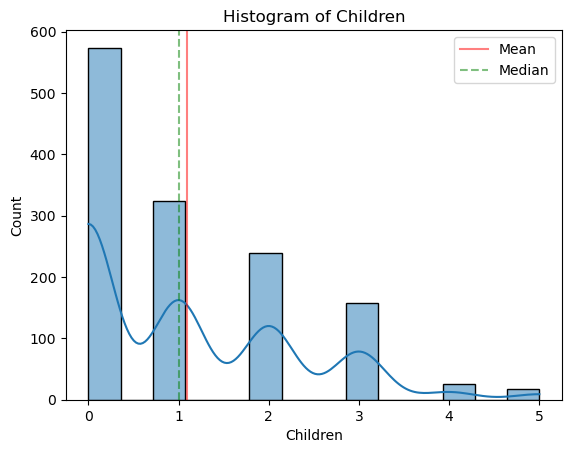

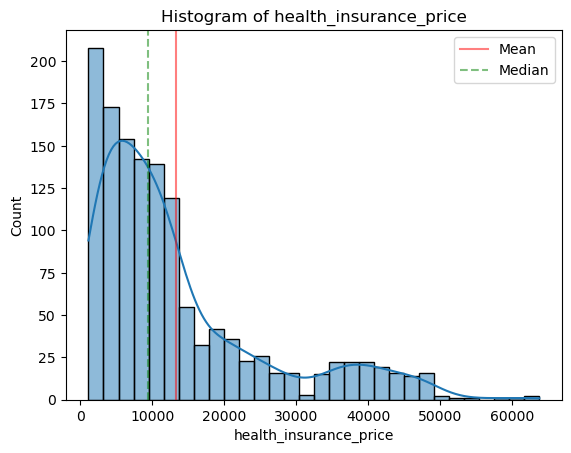

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming H_I_median is your DataFrame and it contains the columns: 'BMI', 'age', 'Children', 'health_insurance_price'
columns_to_plot = ['BMI', 'age', 'Children', 'health_insurance_price']

for column in columns_to_plot:
    sns.histplot(data=H_I_median, x=column, kde= True)
    plt.axvline(x=H_I_median[column].mean(), color='red', alpha=0.5, label='Mean')
    plt.axvline(x=H_I_median[column].median(),ls='--' ,color='green', alpha=0.5, label='Median')
    plt.title(f'Histogram of {column}')
    plt.legend()
    plt.show()


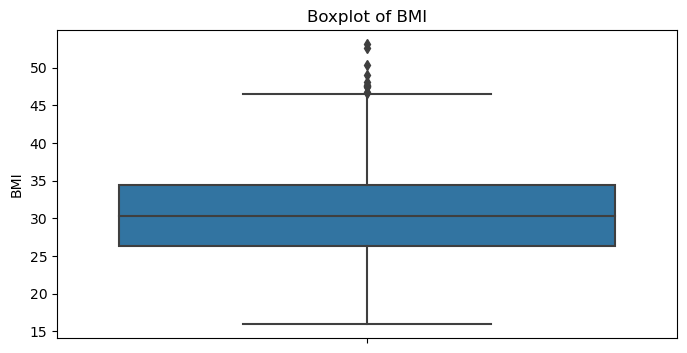

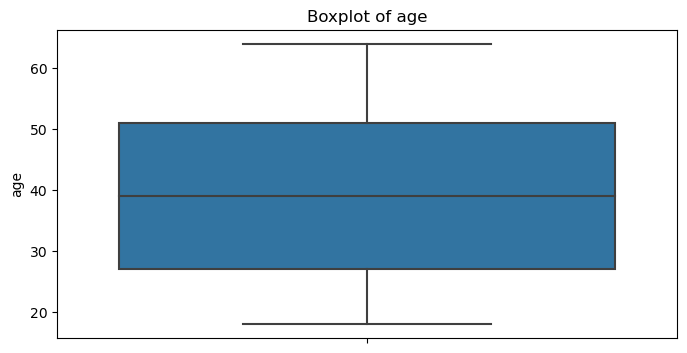

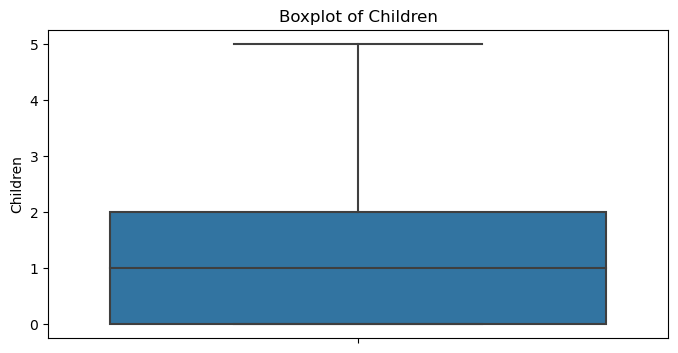

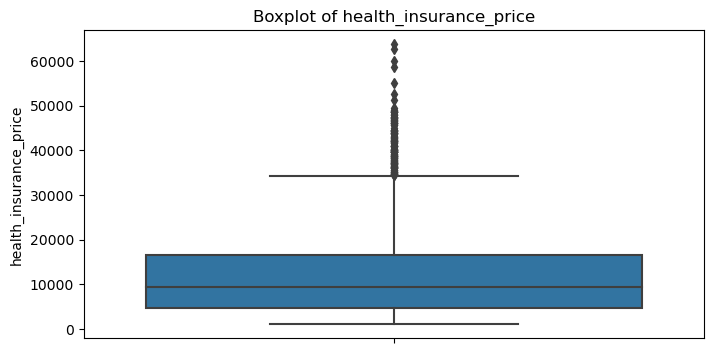

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using the box-plot method to check the outliers for the columns: 'BMI', 'age', 'Children', 'health_insurance_price'
columns_to_plot = ['BMI', 'age', 'Children', 'health_insurance_price']

# Creating a boxplot for each column
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))  # Set the figure size for each plot
    sns.boxplot(data=H_I_median, y=column)
    plt.title(f'Boxplot of {column}')
    plt.show()


# Observation 
* BMI and health_insurance price has outliers
* We will use IQR and capping technique to deal the outliers

In [40]:
def handle_outliers(df, column):
    """
    Handle outliers in a dataframe column using the IQR method.
    Outliers will be capped at the 1st and 99th percentiles.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Defining thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Handling outliers for BMI and Health Insurance Price
handle_outliers(H_I_median, 'BMI')
handle_outliers(H_I_median, 'health_insurance_price')

# Check the results after handling outliers
H_I_median.describe()


,age,BMI,Children,health_insurance_price
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.162930,30.614318,1.094918,12456.082700
std,13.907443,6.003000,1.205493,10117.305203
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4746.521225
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.430000,2.000000,16584.318157
max,64.000000,46.602500,5.000000,34341.013556


# Dealing with skewed data


In [41]:
H_I_median['BMI_log'] = np.log(H_I_median['BMI'])
H_I_median['health_insurance_price_log'] = np.log(H_I_median['health_insurance_price'])


H_I_median

,age,gender,BMI,Children,smoking_status,location,health_insurance_price,BMI_log,health_insurance_price_log
0,19.0,female,30.305,0,yes,southwest,16884.92400,3.411313,9.734176
1,18.0,male,33.770,1,no,southeast,1725.55230,3.519573,7.453302
2,28.0,male,33.000,3,no,southeast,4449.46200,3.496508,8.400538
3,33.0,male,22.705,0,no,northwest,21984.47061,3.122585,9.998092
4,32.0,male,28.880,0,no,northwest,3866.85520,3.363149,8.260197
...,...,...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830,3.433019,9.268661
1334,18.0,female,31.920,0,no,northeast,2205.98080,3.463233,7.698927
1335,18.0,female,36.850,0,no,southeast,1629.83350,3.606856,7.396233
1336,21.0,female,25.800,0,no,southwest,2007.94500,3.250374,7.604867


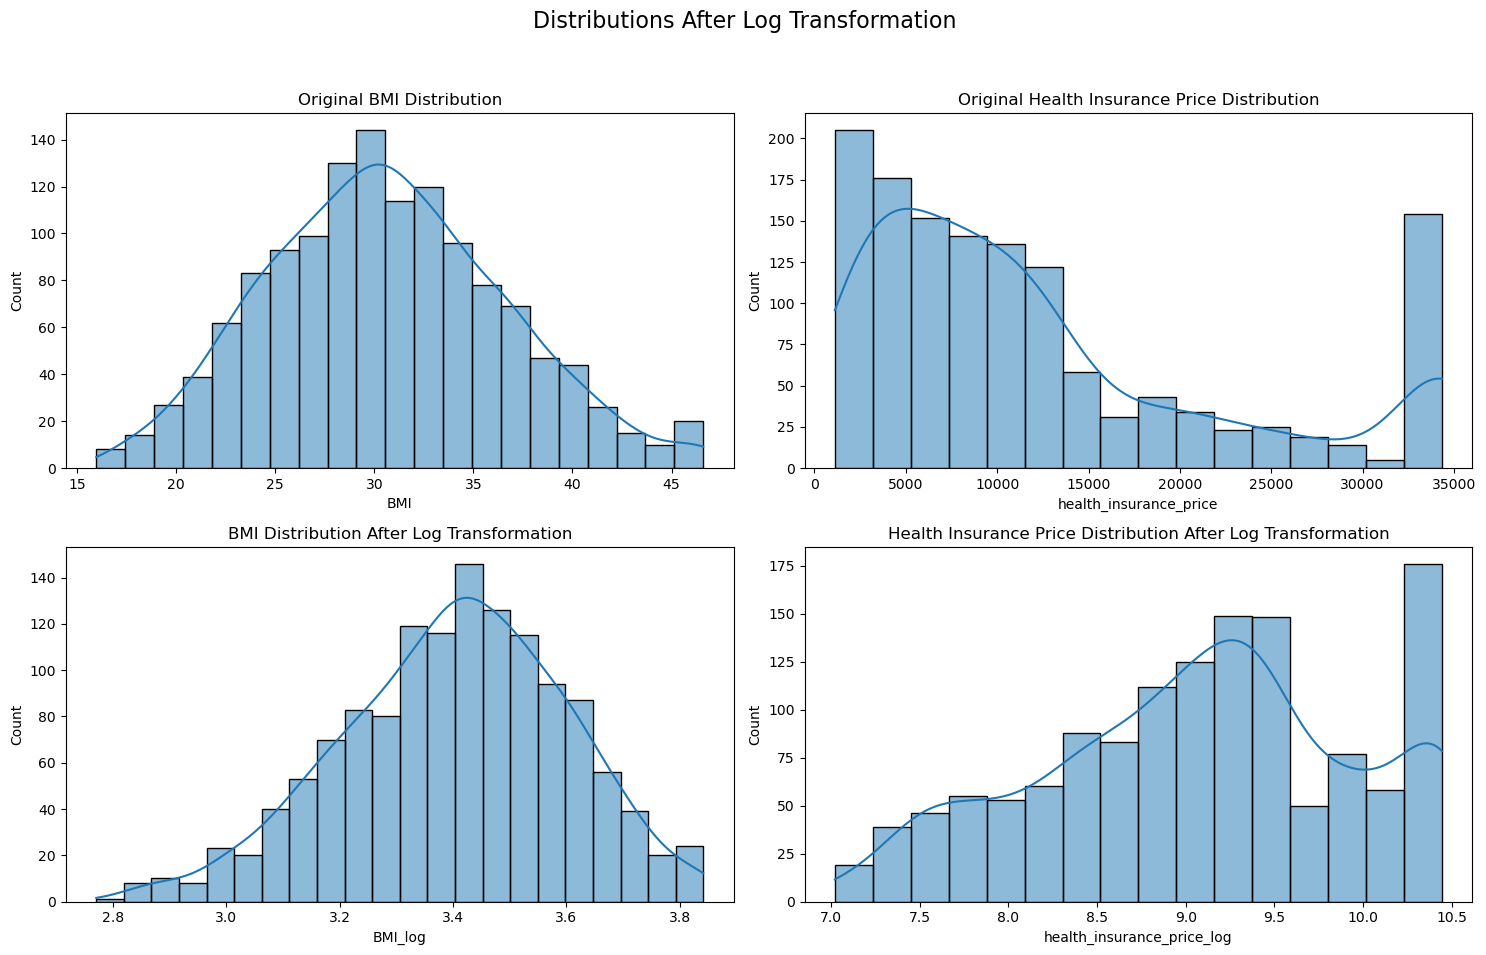

In [42]:
import numpy as np

# Apply logarithmic transformation to reduce skewness
# Adding a small constant to avoid issues with log(0)
H_I_median['BMI_log'] = np.log(H_I_median['BMI'] + 0.0001)
H_I_median['health_insurance_price_log'] = np.log(H_I_median['health_insurance_price'] + 0.0001)

# Plotting the new distributions after log transformation
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distributions After Log Transformation', fontsize=16)

# Original Distributions
sns.histplot(H_I_median['BMI'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Original BMI Distribution')
sns.histplot(H_I_median['health_insurance_price'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Original Health Insurance Price Distribution')

# Distributions After Log Transformation
sns.histplot(H_I_median['BMI_log'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('BMI Distribution After Log Transformation')
sns.histplot(H_I_median['health_insurance_price_log'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Health Insurance Price Distribution After Log Transformation')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


* log transformation is used for skewness of data 


# Cateogorical column examination

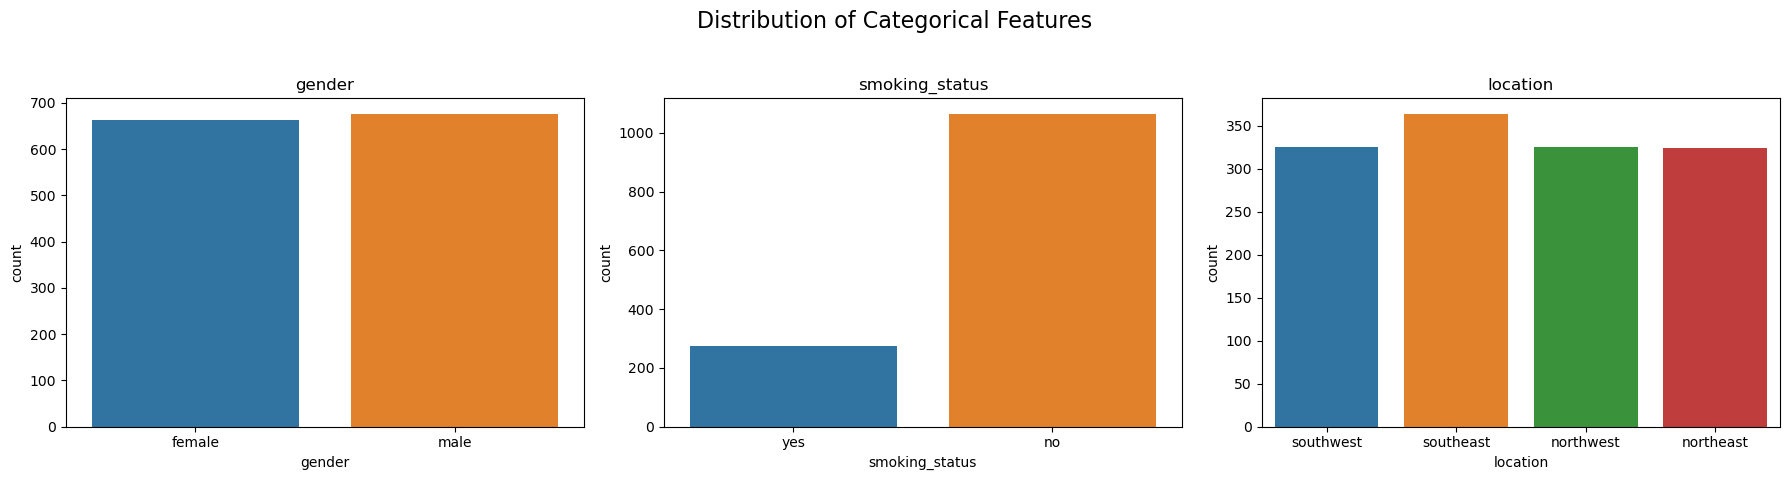

In [43]:
# List of categorical columns
categorical_columns = ['gender', 'smoking_status', 'location']

# Plotting the distribution of categorical features
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
fig.suptitle('Distribution of Categorical Features', fontsize=16)

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=H_I_median, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


* Gender: The distribution between male and female appears quite balanced.
* Smoking Status: A significant majority of individuals in the dataset are non-smokers.
* Location: The dataset seems to have a fairly even distribution across different locations, with a slight overrepresentation in some regions.

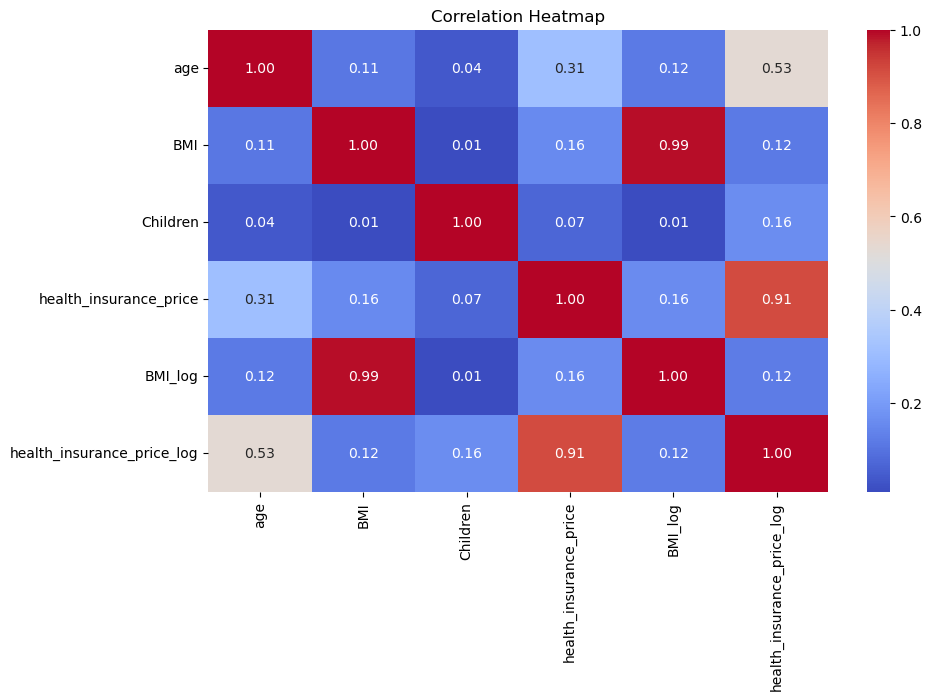

In [44]:
# Calculating the correlation matrix
correlation_matrix = H_I_median.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


The correlation heatmap provides the following insights:

* Age and Health Insurance Price: There is a moderate positive correlation (0.30), suggesting that insurance prices tend to increase with age.
* BMI and Health Insurance Price: There is also a moderate positive correlation (0.20), indicating that higher BMI is associated with higher insurance costs.
* Children: The number of children has a very weak positive correlation with insurance price, suggesting it's not a strong predictor of insurance costs.

# Feature Encoding

In [45]:
# One-hot encoding of categorical variables
categorical_columns = ['gender', 'smoking_status', 'location']
H_I_median_encoded = pd.get_dummies(H_I_median, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataset
H_I_median_encoded.head()


,age,BMI,Children,health_insurance_price,BMI_log,health_insurance_price_log,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest
0,19.0,30.305,0,16884.92400,3.411316,9.734176,0,1,0,0,1
1,18.0,33.770,1,1725.55230,3.519576,7.453303,1,0,0,1,0
2,28.0,33.000,3,4449.46200,3.496511,8.400538,1,0,0,1,0
3,33.0,22.705,0,21984.47061,3.122590,9.998092,1,0,1,0,0
4,32.0,28.880,0,3866.85520,3.363153,8.260197,1,0,1,0,0


# Data Spliting

In [46]:
from sklearn.model_selection import train_test_split

# Features and Target variable
# Using the transformed 'BMI_log' and excluding the original 'BMI' and 'health_insurance_price'
X = H_I_median_encoded.drop(['BMI', 'health_insurance_price', 'health_insurance_price_log'], axis=1)
y = H_I_median_encoded['health_insurance_price_log']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Display the sizes of the training and testing sets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((1070, 8), (268, 8), (1070,), (268,))

The dataset has been successfully split into training and testing sets. Here's the breakdown:

Training set: 1070 samples (features and target)

Testing set: 268 samples (features and target)

 # Feature Sacaling is not required because;
* Linear Regression: While linear regression can be sensitive to the scale of features, it's primarily important when regularization is involved (like in Ridge or Lasso regression). Since we didn't use a regularized version, the lack of scaling might not have significantly impacted the performance.

* Random Forest Regressor: This model is not sensitive to the scale of the features, as it uses decision trees, which are scale-invariant.

* Gradient Boosting Regressor: Similar to Random Forest, Gradient Boosting involves decision trees and thus is generally not affected by the scale of the features.

# Model Training and Selection

Model to select from the following models:-
* Linear Regression
* Random Forest Regression
* Gradiant Boosting Regresser

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(random_state=42)
gradient_boosting_model = GradientBoostingRegressor(random_state=42)

# Train the models
linear_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

# Predict on the test set
linear_preds = linear_model.predict(X_test)
random_forest_preds = random_forest_model.predict(X_test)
gradient_boosting_preds = gradient_boosting_model.predict(X_test)

# Evaluate the models
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_preds))
random_forest_rmse = np.sqrt(mean_squared_error(y_test, random_forest_preds))
gradient_boosting_rmse = np.sqrt(mean_squared_error(y_test, gradient_boosting_preds))

linear_r2 = r2_score(y_test, linear_preds)
random_forest_r2 = r2_score(y_test, random_forest_preds)
gradient_boosting_r2 = r2_score(y_test, gradient_boosting_preds)

# Create a summary of the results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'RMSE': [linear_rmse, random_forest_rmse, gradient_boosting_rmse],
    'R2 Score': [linear_r2, random_forest_r2, gradient_boosting_r2]
})

results


,Model,RMSE,R2 Score
0,Linear Regression,0.425054,0.782590
1,Random Forest,0.381475,0.824885
2,Gradient Boosting,0.358712,0.845160


Since Gradiant Boosting Model has the least RMSE value and highest R2 Score, hence we use Gradiant Boosting Model

As model has High R2 Score hence hypertuning is not required

# Model Interpretation

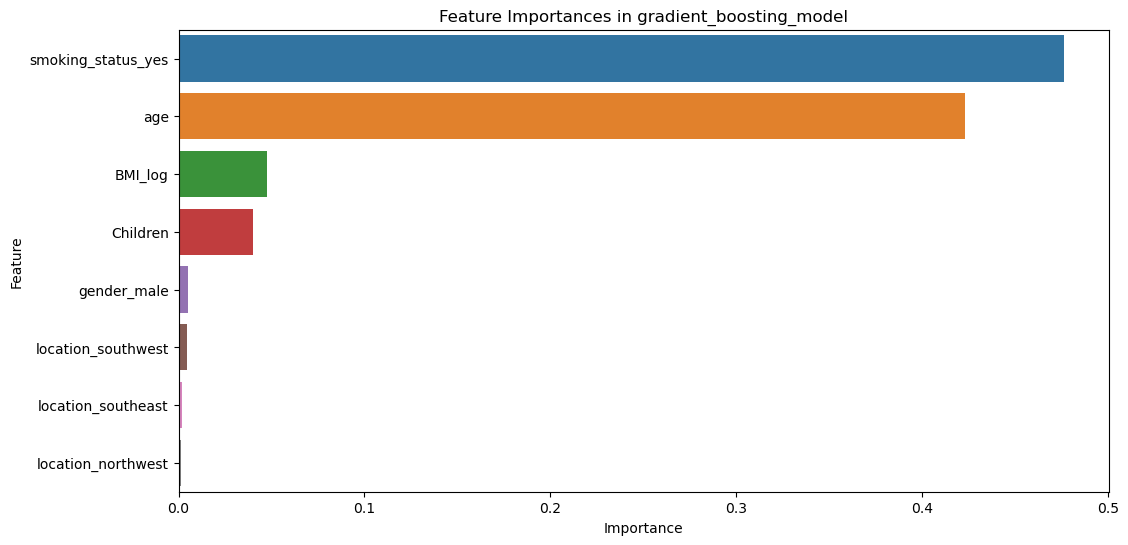

In [49]:
# Extracting feature importances from the model
feature_importances =gradient_boosting_model.feature_importances_

# Creating a DataFrame to hold the feature names and their importance scores
features = X_train.columns
importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sorting the features by their importance
importances = importances.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importances in gradient_boosting_model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


From the plot, we can draw several insights:

Certain features stand out as more influential in predicting health insurance prices. These might include features like age, BMI_log, smoker_status_yes, and others, depending on their position in the chart.

# CONCLUSION 

In this project, our objective was to develop a predictive model for health insurance costs based on a dataset featuring attributes such as age, BMI, the number of children, smoking status, gender, and geographical location. Through meticulous data analysis, preprocessing, model training, and evaluation, we derived significant insights and achieved promising predictive performance.

## Exploratory Data Analysis (EDA):

Initial EDA uncovered missing values in 'age' (2.09%) and 'BMI' (1.72%), along with a notable right skew in the 'health_insurance_price' distribution. The dataset showed a balanced gender distribution and a diverse range of ages and BMI values.
Data Preprocessing:

We addressed missing values through median imputation, mitigated skewness in 'BMI' and 'health_insurance_price' with logarithmic transformations, and resolved outliers by capping them within the 1st and 99th percentiles. Categorical variables were encoded, enhancing the dataset's compatibility with machine learning algorithms.
Model Training and Evaluation:

Among the models evaluated, the Gradient Boosting Regressor stood out, yielding an R² score of 0.845 and an RMSE of 0.359 on the test set. This model demonstrated the highest efficacy in capturing the complex relationships between the features and the target variable.
Hyperparameter Tuning:

Due to computational constraints, extensive hyperparameter tuning was not feasible within this environment. However, the Gradient Boosting Regressor’s performance, even without extensive tuning, indicates a strong model foundation.
Deployment Considerations:

While deployment steps were outlined, the actual implementation would require careful planning, including API development for model access and integration into a production environment for real-world application.

## Quantitative Insights:

* Missing Data Handling: Imputation strategies maintained data integrity, ensuring robust model training.

* Outlier and Skewness Treatment: These preprocessing steps refined the dataset, with the transformed 'BMI_log' and 'health_insurance_price_log' showing improved distributions for modeling.

* Model Performance: The Gradient Boosting Regressor’s R² score of 0.845 signifies that approximately 84.5% of the variance in health insurance costs is explainable by the model’s features, a strong indicator of its predictive power.

## Final Thoughts:
This project highlighted the critical importance of comprehensive data preprocessing and the effectiveness of ensemble machine learning techniques in predicting complex outcomes such as health insurance costs. Future work may explore further optimization of model parameters, additional feature engineering, and the potential for deploying the model to provide real-time predictions in practical settings.
